# 分析马拉松跑步数据

In [2]:
import pandas as pd
marathon = pd.read_csv('~/data/cbcpv/marathon/marathon.csv')
marathon.sample(5)

,age,gender,split,final
13090,41,M,01:52:11,04:19:58
9992,43,M,01:46:45,04:06:16
33409,42,M,02:21:31,06:08:51
4732,42,M,01:42:05,03:34:29
22705,24,W,02:09:14,05:02:55


In [3]:
## 分析数据
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     37250 non-null  int64 
 1   gender  37250 non-null  object
 2   split   37250 non-null  object
 3   final   37250 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [7]:
## 转化时间类型
import datetime
def convert_time(s):
    h, m, s = map(int, s.split(":"))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [34]:
## 从新读取数据
marathon = pd.read_csv('~/data/cbcpv/marathon/marathon.csv', converters={'split':convert_time, 'final':convert_time})
marathon.sample(3)
marathon.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [35]:
## 继续转化
d = datetime.timedelta(hours=1, minutes=0, seconds=0)
df = pd.DataFrame({'time':[d]})
df.astype(int)

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_10056/3291244414.py:4: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df.astype(int)


,time
0,3600000000000


In [36]:
## 转化为秒为单位
d = datetime.timedelta(hours=1, minutes=0, seconds=0)
df = pd.DataFrame({'time':[d]})
df.astype(int) * 1e-9

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_10056/3521588138.py:4: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df.astype(int) * 1e-9


,time
0,3600.0


In [37]:
## 将split和final的特征值转化为秒为单位的整数
marathon['split_sec'] = marathon['split'].astype(int) * 1e-9
marathon['final_sec'] = marathon['final'].astype(int) * 1e-9
marathon.sample(5)

/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_10056/3886410185.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  marathon['split_sec'] = marathon['split'].astype(int) * 1e-9
/var/folders/h4/7cr1cmpn7v5b3x20_9wz8m740000gn/T/ipykernel_10056/3886410185.py:3: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  marathon['final_sec'] = marathon['final'].astype(int) * 1e-9


,age,gender,split,final,split_sec,final_sec
30676,60,M,0 days 02:20:23,0 days 05:43:53,8423.0,20633.0
404,34,M,0 days 01:23:34,0 days 02:49:09,5014.0,10149.0
9022,53,M,0 days 01:41:27,0 days 04:00:51,6087.0,14451.0
34441,20,M,0 days 02:39:47,0 days 06:22:57,9587.0,22977.0
24767,51,W,0 days 02:05:06,0 days 05:12:23,7506.0,18743.0


In [38]:
# 描述统计
marathon.describe()

,age,split,final,split_sec,final_sec
count,37250.000000,37250,37250,37250.000000,37250.000000
mean,40.697369,0 days 02:03:54.425664429,0 days 04:48:09.303597315,7434.425664,17289.303597
std,10.220043,0 days 00:22:55.093889674,0 days 01:03:32.145345151,1375.093890,3812.145345
min,17.000000,0 days 01:05:21,0 days 02:08:51,3921.000000,7731.000000
25%,33.000000,0 days 01:48:25,0 days 04:02:24,6505.000000,14544.000000
50%,40.000000,0 days 02:01:13,0 days 04:44:25,7273.000000,17065.000000
75%,48.000000,0 days 02:16:11,0 days 05:27:36,8171.000000,19656.000000
max,86.000000,0 days 04:59:49,0 days 10:01:08,17989.000000,36068.000000


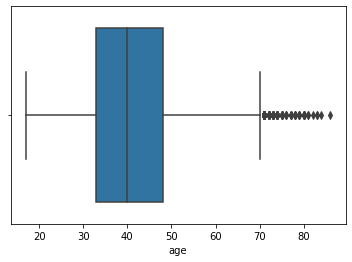

In [39]:
## 查看特征分布
%matplotlib inline
import seaborn as sns
ax = sns.boxplot(x=marathon['age'])

In [40]:
## 数据分布

/Users/du/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='split_sec', ylabel='Density'>

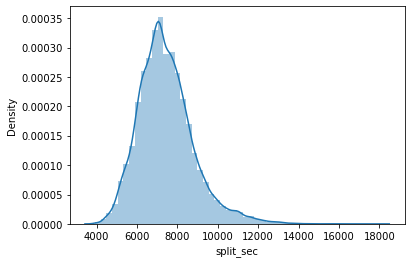

In [41]:
sns.distplot(marathon['split_sec'])

/Users/du/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='final_sec', ylabel='Density'>

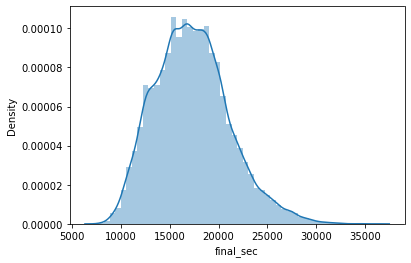

In [42]:
sns.distplot(marathon['final_sec'])

<AxesSubplot:xlabel='gender', ylabel='final_sec'>

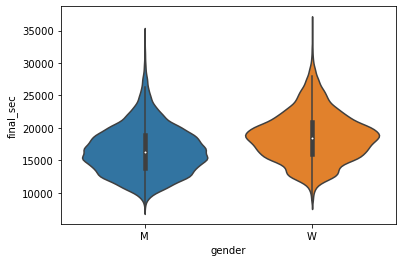

In [43]:
## 添加分类特征gender
sns.violinplot(x='gender', y='final_sec', data=marathon)

/Users/du/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


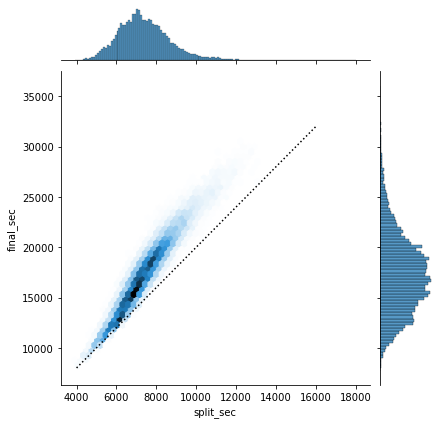

In [44]:
## 寻找优秀的原因
g  =sns.jointplot('split_sec', 'final_sec', data=marathon, kind='hex') # or: kind='scatter

# 绘制一条直线作为参考
import numpy as np
g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [45]:
marathon['split_frac'] =  1 - 2 * marathon['split_sec'] / marathon['final_sec']
marathon.sample(3)

,age,gender,split,final,split_sec,final_sec,split_frac
11186,39,M,0 days 01:51:06,0 days 04:11:58,6666.0,15118.0,0.118137
13937,43,W,0 days 01:56:51,0 days 04:23:54,7011.0,15834.0,0.114437
7292,35,W,0 days 01:47:45,0 days 03:50:51,6465.0,13851.0,0.066493


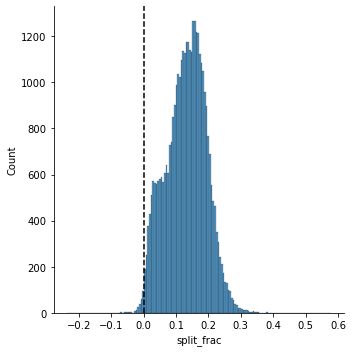

In [47]:
# 直方图看下特征的数据分布,并增加一个参考线
import matplotlib.pyplot as plt
sns.displot(marathon['split_frac'])
plt.axvline(0, color='k', linestyle='--') # 垂直于x轴的直线,0表示x轴位置

In [48]:
## 研究不同特征之间的关系

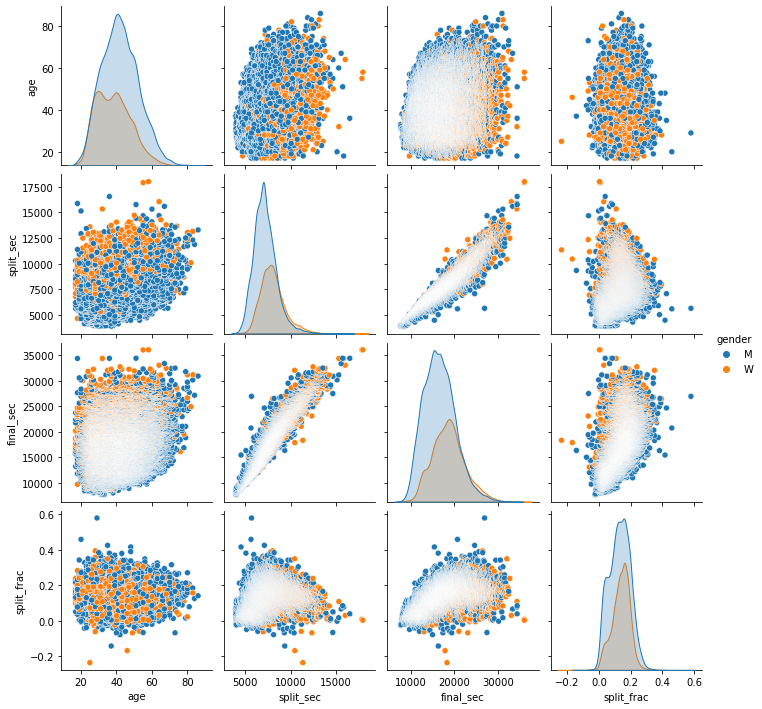

In [49]:
sns.pairplot(data=marathon, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender')

In [50]:
(marathon.age >= 80).sum()

15

In [51]:
## 划分一下年龄段

<AxesSubplot:xlabel='age_dec', ylabel='split_frac'>

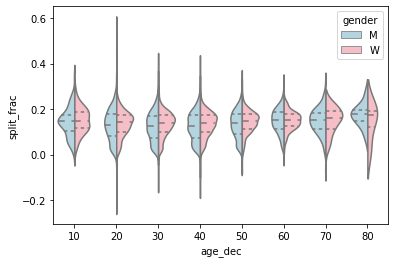

In [52]:
marathon['age_dec']  = marathon['age'].map(lambda age: 10 * (age // 10))
sns.violinplot(x='age_dec', y = 'split_frac', hue='gender', data=marathon, split=True, inner='quartile', palette=['lightblue', 'lightpink'])

<AxesSubplot:xlabel='age_dec', ylabel='final_sec'>

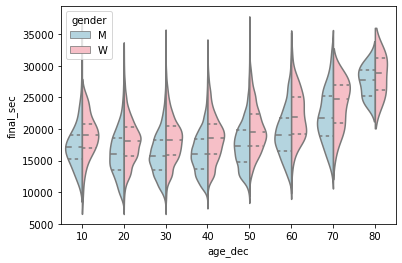

In [53]:
## 全程用时分布比较
sns.violinplot(x='age_dec', y='final_sec', hue='gender', data=marathon, split=True, inner='quartile', palette=['lightblue', 'lightpink'])

In [54]:
# 可视化Pokeman数据

In [55]:
## 导入数据
pokemon = pd.read_csv('~/data/cbcpv/pokemon/pokemon.csv', index_col=0, encoding='cp1252')
pokemon.sample(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
136,Flareon,Fire,NaN,525,65,130,60,95,110,65,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False
56,Mankey,Fighting,NaN,305,40,80,35,35,45,70,1,False
22,Fearow,Normal,Flying,442,65,90,65,61,61,100,2,False


In [58]:
pokemon.info()
pokemon.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


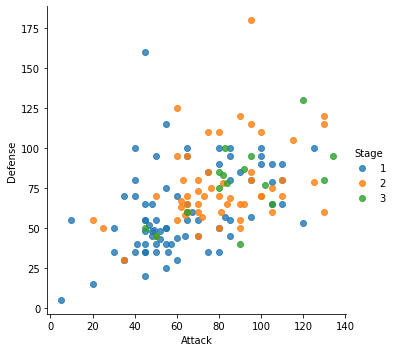

In [59]:
## 散点图研究Attack和Defense的关系
sns.lmplot(x='Attack', y='Defense', data=pokemon, fit_reg=False, hue='Stage')

<AxesSubplot:>

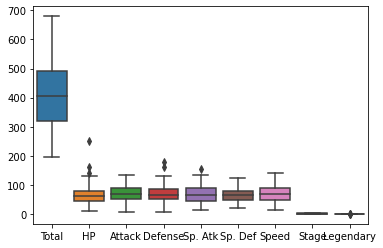

In [60]:
## 各个特征数据分布
sns.boxplot(data=pokemon)

<AxesSubplot:>

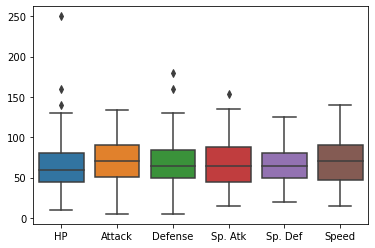

In [63]:
# 选择特征
drop_feature = ['Total', 'Stage', 'Legendary']
stats_pokemon = pokemon.drop(drop_feature, axis=1)
sns.boxplot(data=stats_pokemon)

In [64]:
# 绘制特征Attack相对于特征Type 1数据的分布
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

Text(0.5, 1.0, 'Attack by Type')

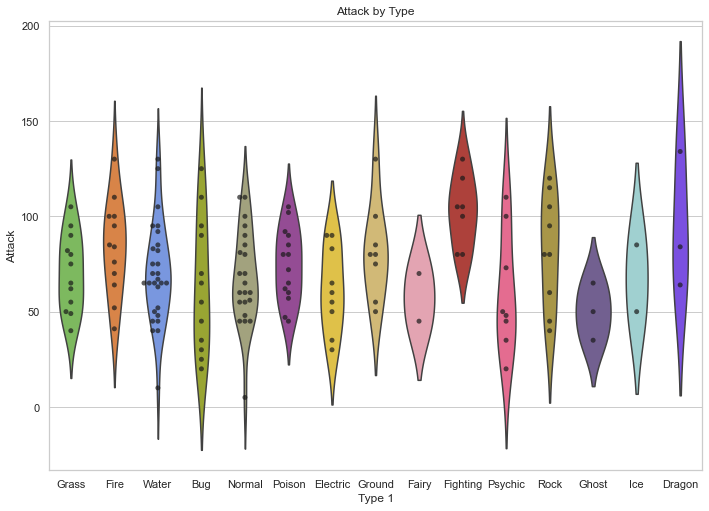

In [65]:
sns.set(
    style='whitegrid', 
    rc={'figure.figsize':(11.7, 8.27)}
)
pkmn_type_colors = [
    '#78C850',  # Grass
    '#F08030',  # Fire
    '#6890F0',  # Water
    '#A8B820',  # Bug
    '#A8A878',  # Normal
    '#A040A0',  # Poison
    '#F8D030',  # Electric
    '#E0C068',  # Ground
    '#EE99AC',  # Fairy
    '#C03028',  # Fighting
    '#F85888',  # Psychic
    '#B8A038',  # Rock
    '#705898',  # Ghost
    '#98D8D8',  # Ice
    '#7038F8',  # Dragon
]
sns.violinplot(
    x='Type 1', 
    y='Attack', 
    data=pokemon, 
    inner=None, 
    palette=pkmn_type_colors
)
sns.swarmplot(
    x='Type 1',
    y='Attack',
    data=pokemon,
    color='k',
    alpha=.7
)
plt.title('Attack by Type')

In [66]:
stats_pokemon.sample(5)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
58,Growlithe,Fire,NaN,55,70,45,70,50,60
80,Slowbro,Water,Psychic,95,75,110,100,80,30
86,Seel,Water,NaN,65,45,55,45,70,45
106,Hitmonlee,Fighting,NaN,50,120,53,35,110,87
4,Charmander,Fire,NaN,39,52,43,60,50,65


In [67]:
# 指定的特征进行归并
melted_pokmon = pd.melt(stats_pokemon, id_vars=['Name', 'Type 1', 'Type 2'], # 保留的特征
    var_name='Stat' # 其余特征规定到此列
) 

melted_pokmon.sample(10)

,Name,Type 1,Type 2,Stat,value
347,Paras,Bug,Grass,Defense,55
886,Ditto,Normal,NaN,Speed,48
611,Wartortle,Water,NaN,Sp. Def,80
706,Exeggutor,Grass,Psychic,Sp. Def,65
82,Farfetch'd,Normal,Flying,HP,52
811,Primeape,Fighting,NaN,Speed,95
559,Hitmonchan,Fighting,NaN,Sp. Atk,35
606,Venusaur,Grass,Poison,Sp. Def,100
599,Dratini,Dragon,NaN,Sp. Atk,50
608,Charmeleon,Fire,NaN,Sp. Def,65


In [68]:
melted_pokmon['Stat'].unique()

array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype=object)

<AxesSubplot:xlabel='Stat', ylabel='value'>

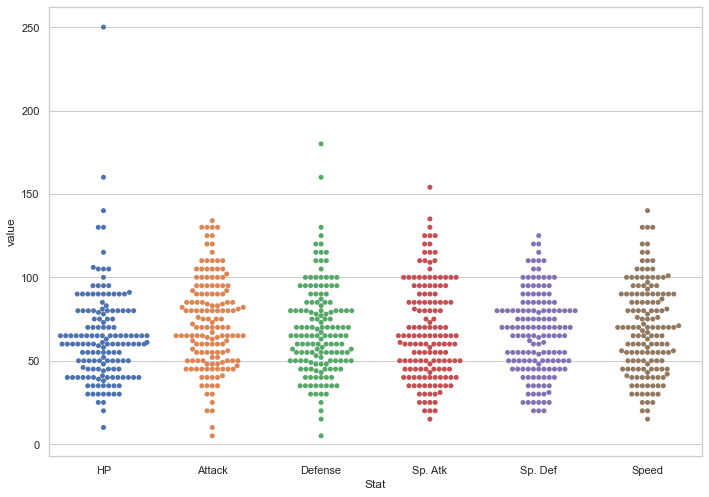

In [69]:
sns.swarmplot(x='Stat', y='value', data=melted_pokmon)

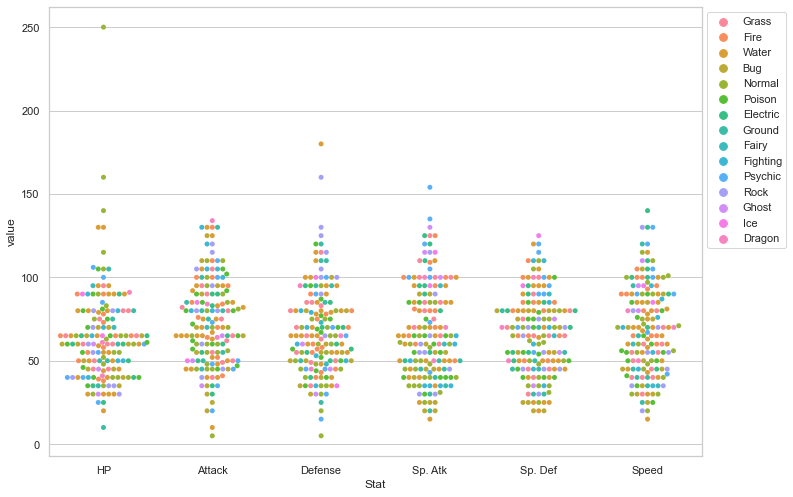

In [70]:
# 叠加分类
sns.swarmplot(x='Stat', y='value', data=melted_pokmon, hue='Type 1')
plt.legend(bbox_to_anchor=(1, 1), loc=2)